In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('movie_by_votes.csv', index_col=0)
df.head()

,movie,imdb,metascore,votes,gross,year
0,The Shawshank Redemption,9.3,80,1838073,28341469,1994
1,The Dark Knight,9.0,82,1817974,533316061,2008
2,Inception,8.8,74,1608158,292568851,2010
3,Fight Club,8.8,66,1473065,37023395,1999
4,Pulp Fiction,8.9,94,1438920,107930000,1994


In [3]:
df[(df['imdb']>8.8) & (df['imdb']<9)]['votes'].values

array([1438920, 1317041,  943874,  545356])

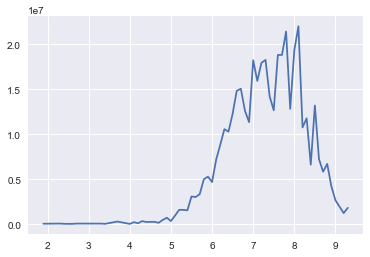

In [4]:
df.groupby('imdb').sum()['votes']
plt.plot(df.groupby('imdb').sum()['votes'])

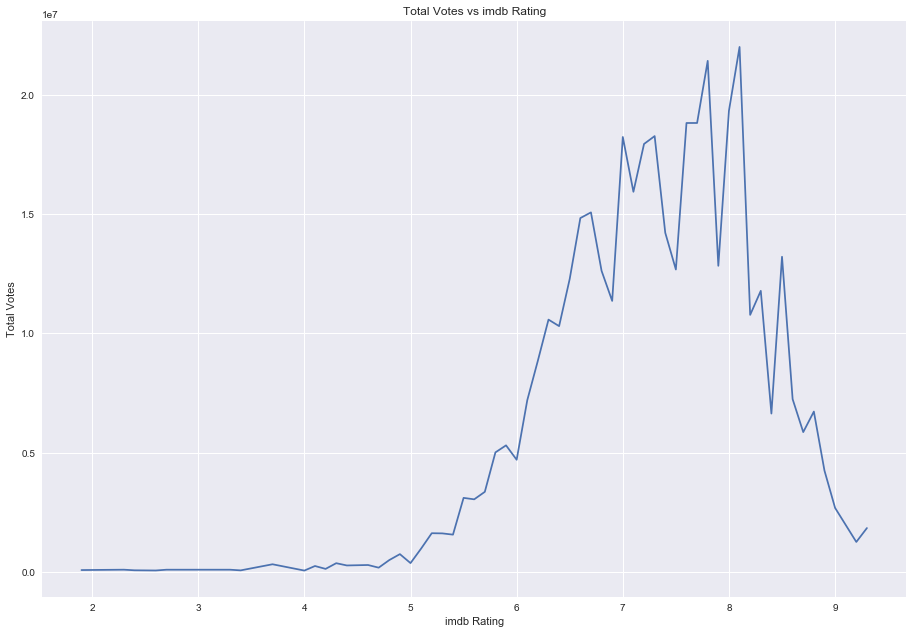

In [5]:
#total votes vs imdb
fig3 = plt.figure(figsize=(12,8))
ax3 = fig3.add_axes([0,0,1,1])
ax3.plot(df.groupby('imdb').sum()['votes'])
ax3.set_title('Total Votes vs imdb Rating')
ax3.set_xlabel('imdb Rating')
ax3.set_ylabel('Total Votes')

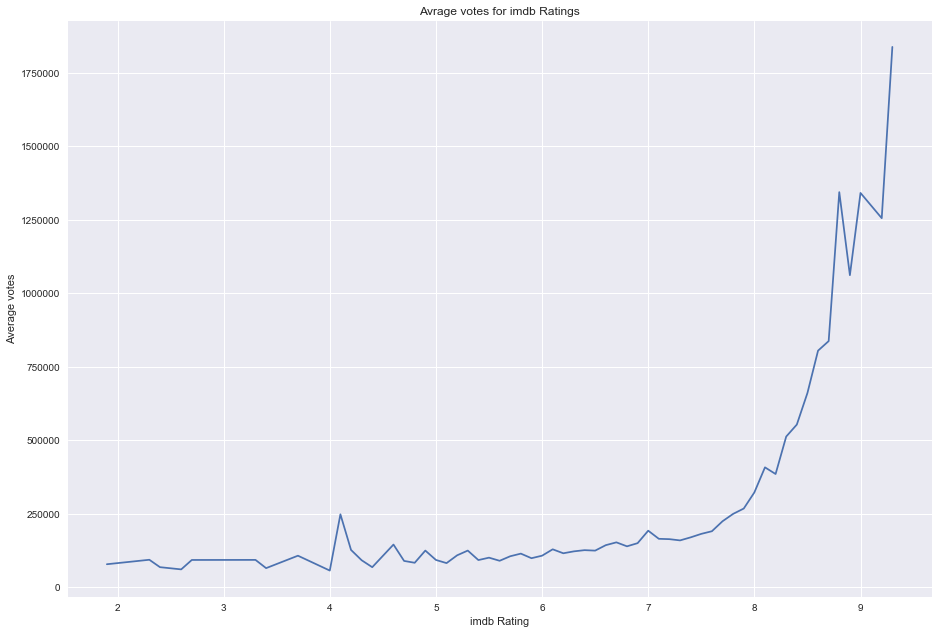

In [6]:
# votes vs imdb
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
#ax.plot(np.arange(0,10.1,0.1), [0]*101)
ax.plot(df.groupby('imdb').mean()['votes'])
ax.set_xlabel('imdb Rating')
ax.set_ylabel('Average votes')
ax.set_title('Avrage votes for imdb Ratings')

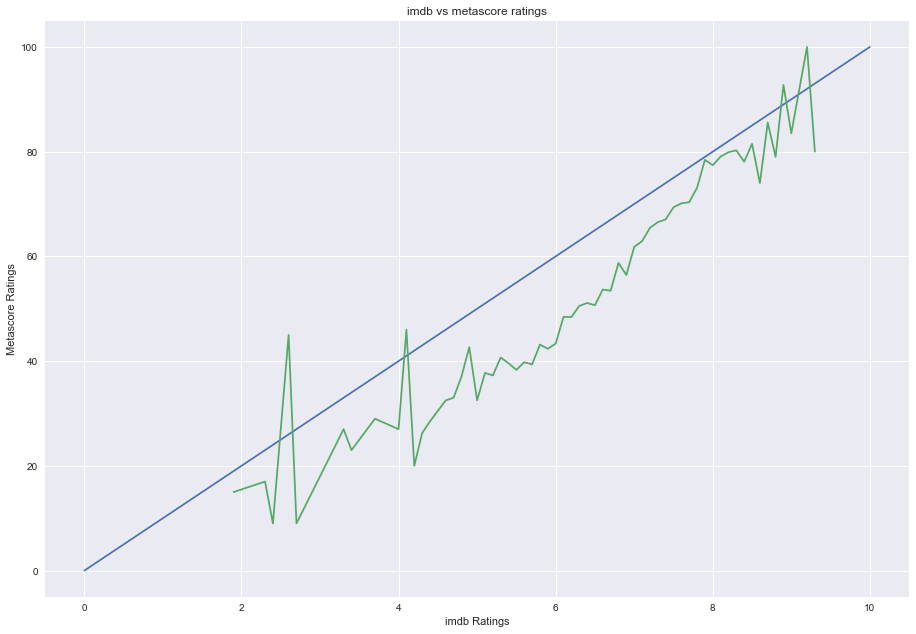

In [7]:
# imdb vs metascore
fig2 = plt.figure(figsize=(12,8))
ax2 = fig2.add_axes([0,0,1,1])
ax2.plot(range(0,11), [i*10 for i in range(0,11)])
ax2.plot(df.groupby('imdb').mean()['metascore'])
ax2.set_title('imdb vs metascore ratings')
ax2.set_xlabel('imdb Ratings')
ax2.set_ylabel('Metascore Ratings')

In [8]:
df[df['year']>2000].groupby('year').mean()['imdb'].values

array([ 6.9       ,  6.84246575,  6.845     ,  6.90543478,  6.70204082,
        6.82952381,  6.82818182,  6.6271028 ,  6.71517857,  6.68034188,
        6.68110236,  6.79047619,  6.78712121,  6.85392157,  6.82470588,
        6.89647059,  7.32105263])

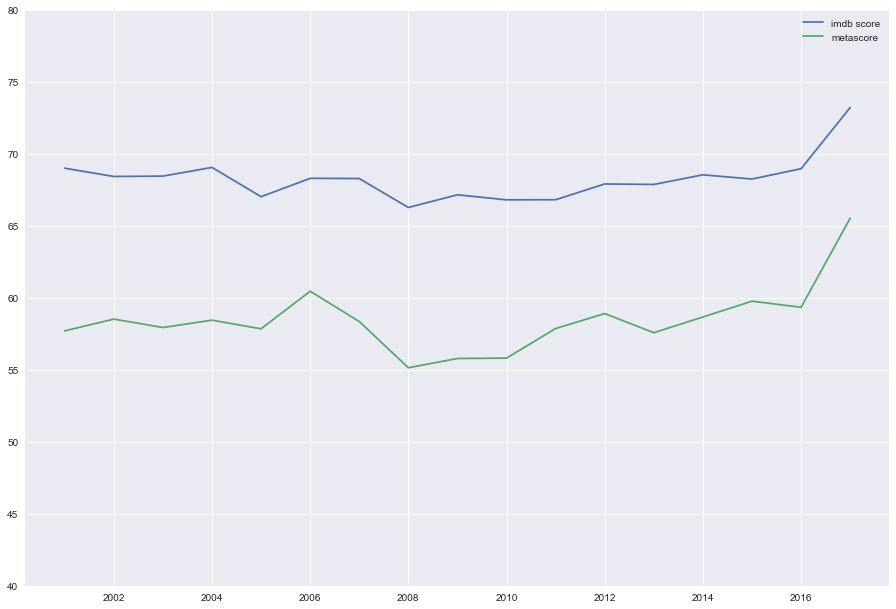

In [9]:
# Ratings with year
fig4 = plt.figure(figsize=(12,8))
ax4 = fig4.add_axes([0,0,1,1])
ax4.plot(df[df['year']>2000].groupby('year').mean()['imdb']*10, label='imdb score')
ax4.plot(df[df['year']>2000].groupby('year').mean()['metascore'], label='metascore')
ax4.set_ylim([40,80])
ax4.legend()

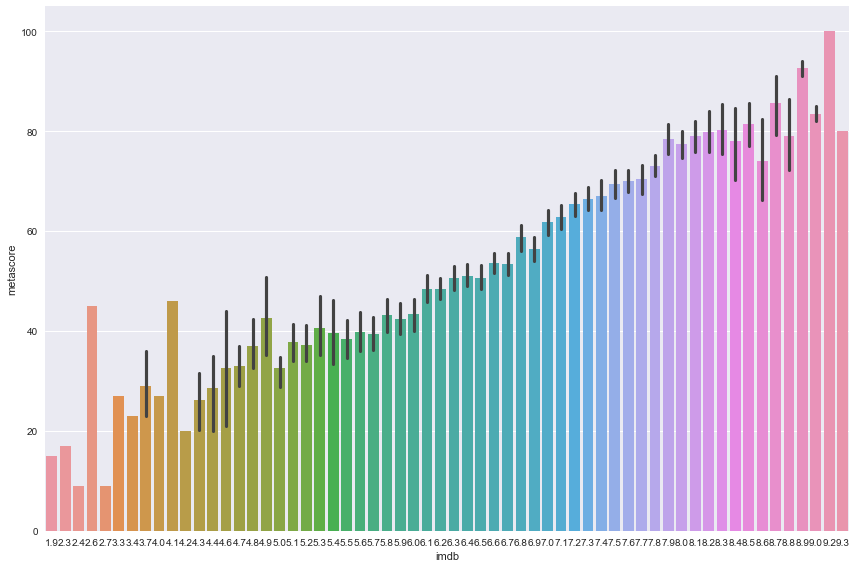

In [21]:
plt.figure(figsize=(12,8))
sns.factorplot(x='imdb', y='metascore', kind='bar', data=df, size=8, aspect=1.5)
plt.tight_layout()

In [35]:
df[df['imdb']==8.6]['metascore'].std()

13.892443989449804